# 1. Data Preparation

## 1.1 Load Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2 Load Dataset

In [2]:
dataset = pd.read_csv("Dataset/healthcare-dataset-stroke-data.csv")
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 1.3 Data Validation

In [3]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Diketahui ada data null (kosong) di kolom `bmi`

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
round((dataset.describe()),2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


Diketahui kolom `age` nilai minimum 0.08 akan kita cek pada saat **EDA**

In [6]:
dataset.shape

(5110, 12)

## 1.4 Data Splitting

### 1. Drop Column yang tidak digunakan untuk modelling

In [7]:
dataset = dataset.drop("id", axis=1)
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
dataset.shape

(5110, 11)

### 2. Cek apakah ada Duplicated Data

In [9]:
dataset.duplicated().any()

False

### 3. Split data X dan Y

In [10]:
x = dataset.drop("stroke", axis=1)
y = dataset["stroke"]

In [11]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [12]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [13]:
x.shape

(5110, 10)

In [14]:
y.shape

(5110,)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3, 
                                                    random_state=12345,
                                                    stratify = y)

In [16]:
x_train.shape

(3577, 10)

In [17]:
y_train.shape

(3577,)

In [18]:
x_test.shape

(1533, 10)

In [19]:
y_test.shape

(1533,)

# 2. Exploratory Data Analysis

yang akan dilakukan eksplorasi adalah data training

In [20]:
train_set = pd.concat([x_train, y_train], axis = 1)
train_set.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
855,Female,32.00,0,0,Yes,Private,Rural,91.98,27.6,smokes,0
1243,Female,3.00,0,0,No,children,Rural,94.12,21.4,Unknown,0
3993,Female,41.00,0,0,Yes,Private,Urban,92.14,29.6,formerly smoked,0
3319,Female,1.08,0,0,No,children,Urban,159.39,12.8,Unknown,0
3629,Male,34.00,0,0,Yes,Private,Urban,99.23,NaN,smokes,0


## 2.1 Checking Unique Value setiap kolom tipe kategorikal

In [21]:
cat_col = train_set[["gender", 
                   "hypertension", 
                   "heart_disease", 
                   "ever_married", 
                   "work_type", 
                   "Residence_type", 
                   "smoking_status", 
                   "stroke"]]
for col in cat_col :
    print(cat_col[col].unique())

['Female' 'Male' 'Other']
[0 1]
[0 1]
['Yes' 'No']
['Private' 'children' 'Govt_job' 'Self-employed' 'Never_worked']
['Rural' 'Urban']
['smokes' 'Unknown' 'formerly smoked' 'never smoked']
[0 1]


Dikarenakan di gender ada unique values "Other" kita cek berapa jumlah datanya karena ini jelas gender yg membingungkan

In [22]:
(train_set["gender"]=="Other").value_counts()

False    3576
True        1
Name: gender, dtype: int64

Gender "Other" akan di drop pada saat preprocessing

## 2.2 Stroke Distribution

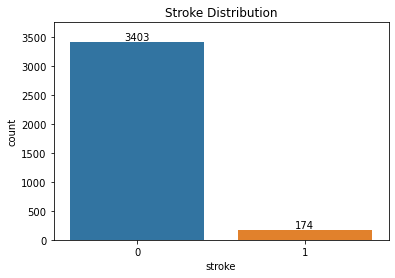

In [23]:
ax = sns.countplot(data = train_set, 
                   x = "stroke", 
                   label = train_set["stroke"].unique())
ax.set(title = "Stroke Distribution", 
       ylim = [0, 3750])
ax.bar_label(ax.containers[0]);

Dikarenakan data imbalance maka akan dilakukan balancing dengan metode **SMOTE**

## 2.3 Checking Missing Value

In [24]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 855 to 2049
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3577 non-null   object 
 1   age                3577 non-null   float64
 2   hypertension       3577 non-null   int64  
 3   heart_disease      3577 non-null   int64  
 4   ever_married       3577 non-null   object 
 5   work_type          3577 non-null   object 
 6   Residence_type     3577 non-null   object 
 7   avg_glucose_level  3577 non-null   float64
 8   bmi                3443 non-null   float64
 9   smoking_status     3577 non-null   object 
 10  stroke             3577 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 335.3+ KB


Diketahui kolom `bmi` memiliki missing value dan akan diimputasi. Sebelum diimputasi kita lihat distribusinya terlebih dahulu

## 2.4 BMI Distribution

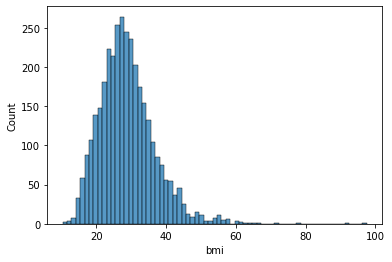

In [25]:
ax = sns.histplot(train_set.bmi);

diketahui data `bmi` skewed dan karena ini adalah data numerik maka sebaiknya di data processing akan diimputasi menggunakan metode **median**

## 2.5 Correlation Matrix

In [26]:
num_col = train_set[["age", 
                     "avg_glucose_level", 
                     "bmi"]]
num_w_target = train_set[["age", 
                          "avg_glucose_level", 
                          "bmi",
                          "stroke"]]

round((num_w_target.corr()),2)

,age,avg_glucose_level,bmi,stroke
age,1.00,0.22,0.33,0.24
avg_glucose_level,0.22,1.00,0.17,0.15
bmi,0.33,0.17,1.00,0.06
stroke,0.24,0.15,0.06,1.00


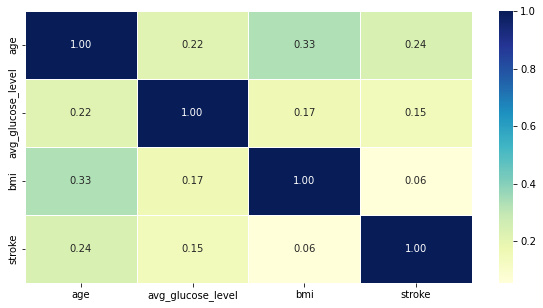

In [27]:
corr_matrix = num_w_target.corr()
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

Diketahui korelasi antar data berkategori numerik terhadap target `(stroke)` masih tergolong rendah korelasinya

## 2.6 Stroke Frequency per Hypertension

In [28]:
pd.crosstab(train_set.hypertension, train_set.stroke)

stroke,0,1
hypertension,,
0,3095,124
1,308,50


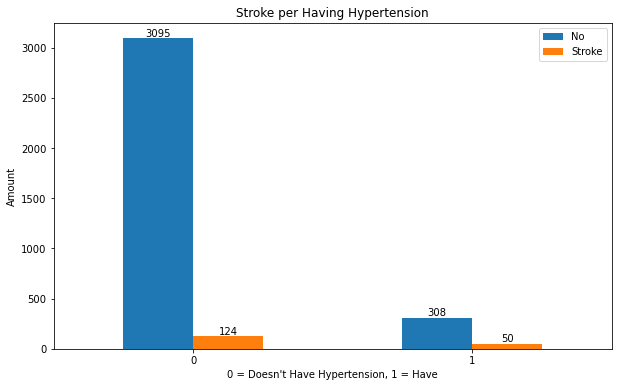

In [29]:
ax = pd.crosstab(train_set.hypertension, train_set.stroke).plot(kind="bar",
                                                           figsize=(10,6));

plt.title("Stroke per Having Hypertension")
plt.xlabel("0 = Doesn't Have Hypertension, 1 = Have")
plt.ylabel("Amount")
plt.legend(["No", "Stroke"])
plt.xticks(rotation=0)
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1]);

## 2.7 Stroke Frequency per Heart Disease

In [30]:
pd.crosstab(train_set.heart_disease, train_set.stroke)

stroke,0,1
heart_disease,,
0,3248,145
1,155,29


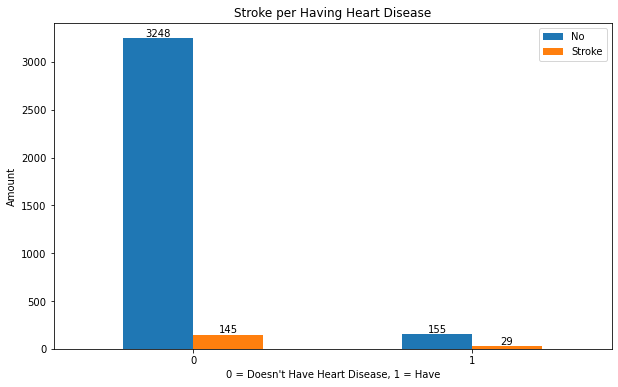

In [31]:
ax = pd.crosstab(train_set.heart_disease, train_set.stroke).plot(kind="bar",
                                                           figsize=(10,6));

plt.title("Stroke per Having Heart Disease")
plt.xlabel("0 = Doesn't Have Heart Disease, 1 = Have")
plt.ylabel("Amount")
plt.legend(["No", "Stroke"])
plt.xticks(rotation=0)
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1]);

## 2.8 Stroke Frequency per Smoke Status

In [32]:
pd.crosstab(train_set.smoking_status, train_set.stroke)

stroke,0,1
smoking_status,,
Unknown,1021,33
formerly smoked,577,45
never smoked,1265,67
smokes,540,29


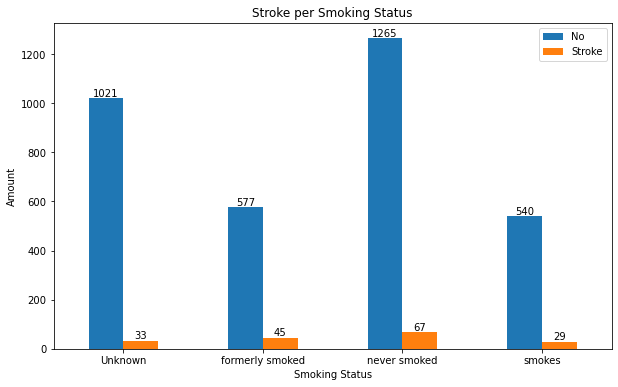

In [33]:
ax = pd.crosstab(train_set.smoking_status, train_set.stroke).plot(kind="bar",
                                                           figsize=(10,6));

plt.title("Stroke per Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Amount")
plt.legend(["No", "Stroke"])
plt.xticks(rotation=0)
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1]);

## 2.9 Stroke Frequency per Work Type

In [34]:
pd.crosstab(train_set.work_type, train_set.stroke)

stroke,0,1
work_type,,
Govt_job,440,27
Never_worked,15,0
Private,1957,105
Self-employed,518,40
children,473,2


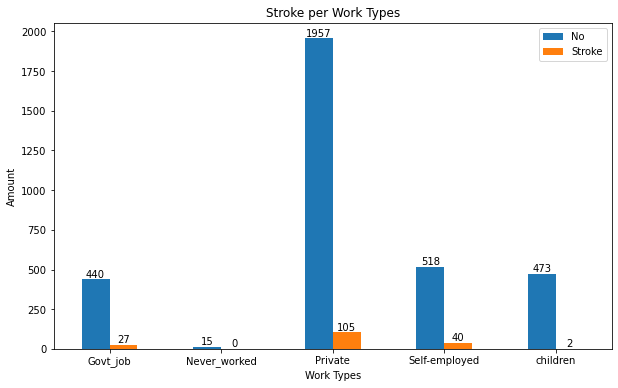

In [35]:
ax = pd.crosstab(train_set.work_type, train_set.stroke).plot(kind="bar",
                                                        figsize=(10,6));

plt.title("Stroke per Work Types")
plt.xlabel("Work Types")
plt.ylabel("Amount")
plt.legend(["No", "Stroke"])
plt.xticks(rotation=0)
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1]);

## 2.10 Stroke Frequency per Ever Married

In [36]:
pd.crosstab(train_set.ever_married, train_set.stroke)

stroke,0,1
ever_married,,
No,1201,25
Yes,2202,149


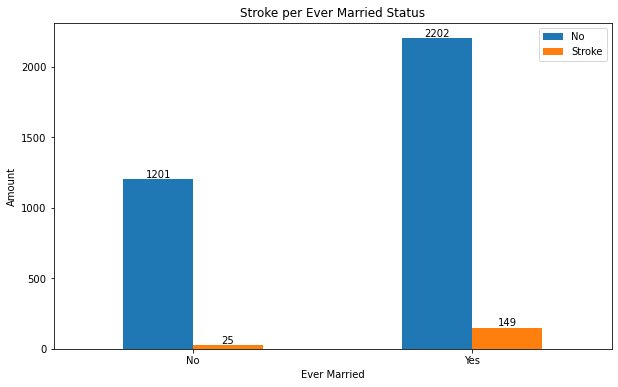

In [37]:
ax = pd.crosstab(train_set.ever_married, train_set.stroke).plot(kind="bar",
                                                           figsize=(10,6));

plt.title("Stroke per Ever Married Status")
plt.xlabel("Ever Married")
plt.ylabel("Amount")
plt.legend(["No", "Stroke"])
plt.xticks(rotation=0)
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1]);

## 2.11 Stroke Frequency per Residential Types

In [38]:
pd.crosstab(train_set.Residence_type, train_set.stroke)

stroke,0,1
Residence_type,,
Rural,1671,84
Urban,1732,90


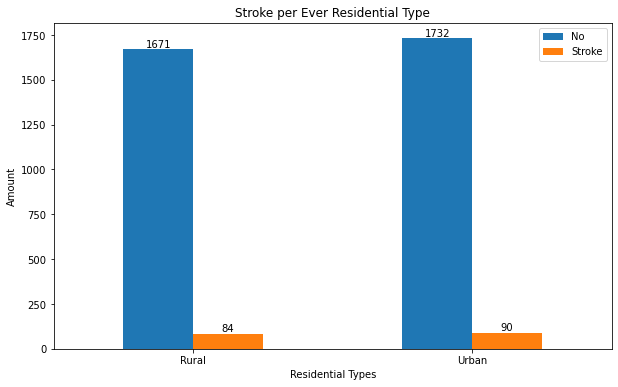

In [39]:
ax = pd.crosstab(train_set.Residence_type, train_set.stroke).plot(kind="bar",
                                                             figsize=(10,6));

plt.title("Stroke per Ever Residential Type")
plt.xlabel("Residential Types")
plt.ylabel("Amount")
plt.legend(["No", "Stroke"])
plt.xticks(rotation=0)
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1]);

# 3. Data Preprocessing

In [40]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
855,Female,32.00,0,0,Yes,Private,Rural,91.98,27.6,smokes
1243,Female,3.00,0,0,No,children,Rural,94.12,21.4,Unknown
3993,Female,41.00,0,0,Yes,Private,Urban,92.14,29.6,formerly smoked
3319,Female,1.08,0,0,No,children,Urban,159.39,12.8,Unknown
3629,Male,34.00,0,0,Yes,Private,Urban,99.23,NaN,smokes


In [41]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 855 to 2049
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3577 non-null   object 
 1   age                3577 non-null   float64
 2   hypertension       3577 non-null   int64  
 3   heart_disease      3577 non-null   int64  
 4   ever_married       3577 non-null   object 
 5   work_type          3577 non-null   object 
 6   Residence_type     3577 non-null   object 
 7   avg_glucose_level  3577 non-null   float64
 8   bmi                3443 non-null   float64
 9   smoking_status     3577 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 307.4+ KB


In [42]:
cat_col = train_set[["gender", 
                   "hypertension", 
                   "heart_disease", 
                   "ever_married", 
                   "work_type", 
                   "Residence_type", 
                   "smoking_status", 
                   "stroke"]]
for col in cat_col :
    print(cat_col[col].unique())

['Female' 'Male' 'Other']
[0 1]
[0 1]
['Yes' 'No']
['Private' 'children' 'Govt_job' 'Self-employed' 'Never_worked']
['Rural' 'Urban']
['smokes' 'Unknown' 'formerly smoked' 'never smoked']
[0 1]


drop data yang memiliki gender "other"

In [43]:
data_concat = pd.concat([x_train, y_train], axis = 1)

In [44]:
data_concat = data_concat.drop(data_concat[data_concat.gender == "Other"].index)
data_concat.info

<bound method DataFrame.info of       gender    age  hypertension  heart_disease ever_married work_type  \
855   Female  32.00             0              0          Yes   Private   
1243  Female   3.00             0              0           No  children   
3993  Female  41.00             0              0          Yes   Private   
3319  Female   1.08             0              0           No  children   
3629    Male  34.00             0              0          Yes   Private   
...      ...    ...           ...            ...          ...       ...   
1394  Female  21.00             0              0           No   Private   
4982    Male  20.00             0              0           No   Private   
1177    Male  23.00             0              0           No   Private   
3361    Male  48.00             0              0          Yes   Private   
2049  Female  50.00             0              0          Yes  Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  stro

In [45]:
x_train = data_concat.drop("stroke", axis=1)
y_train = data_concat["stroke"]

## 3.1 Categorical & Numerical Splitting

Dikarenakan beberapa kolom bertipe kategorikal sudah berbentuk binary seperti kolom:
* `hypertension`
* `heart_disease`

maka kita anggap kolom tersebut adalah kolom numerikal

In [46]:
categorical_cols = x_train[["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]]
numerical_cols = x_train[["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]]

In [47]:
categorical_cols

,gender,ever_married,work_type,Residence_type,smoking_status
855,Female,Yes,Private,Rural,smokes
1243,Female,No,children,Rural,Unknown
3993,Female,Yes,Private,Urban,formerly smoked
3319,Female,No,children,Urban,Unknown
3629,Male,Yes,Private,Urban,smokes
...,...,...,...,...,...
1394,Female,No,Private,Urban,smokes
4982,Male,No,Private,Rural,never smoked
1177,Male,No,Private,Urban,never smoked
3361,Male,Yes,Private,Rural,Unknown


In [48]:
numerical_cols

,age,hypertension,heart_disease,avg_glucose_level,bmi
855,32.00,0,0,91.98,27.6
1243,3.00,0,0,94.12,21.4
3993,41.00,0,0,92.14,29.6
3319,1.08,0,0,159.39,12.8
3629,34.00,0,0,99.23,NaN
...,...,...,...,...,...
1394,21.00,0,0,90.16,28.9
4982,20.00,0,0,75.90,32.2
1177,23.00,0,0,115.98,22.3
3361,48.00,0,0,62.89,29.6


## 3.2 Numerical Data Imputation

In [49]:
numerical_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3576 entries, 855 to 2049
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3576 non-null   float64
 1   hypertension       3576 non-null   int64  
 2   heart_disease      3576 non-null   int64  
 3   avg_glucose_level  3576 non-null   float64
 4   bmi                3442 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 167.6 KB


Diketahui ada missing value di kolom `bmi` dan dari EDA yang telah dilakukan makan akan dilakukan imputasi dengan strategy mengisinya dengan median data

In [50]:
from sklearn.impute import SimpleImputer

# Buat Imputer
imputer = SimpleImputer(missing_values = np.nan,
                        strategy = "median")

# Fit Imputer
imputer.fit(numerical_cols)

# Transform Data
imputed_data = pd.DataFrame(imputer.transform(numerical_cols))
imputed_data.columns = numerical_cols.columns
imputed_data.index = numerical_cols.index

In [51]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3576 entries, 855 to 2049
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3576 non-null   float64
 1   hypertension       3576 non-null   float64
 2   heart_disease      3576 non-null   float64
 3   avg_glucose_level  3576 non-null   float64
 4   bmi                3576 non-null   float64
dtypes: float64(5)
memory usage: 167.6 KB


## 3.3 Categorical Data Imputation

In [52]:
categorical_cols.head()

,gender,ever_married,work_type,Residence_type,smoking_status
855,Female,Yes,Private,Rural,smokes
1243,Female,No,children,Rural,Unknown
3993,Female,Yes,Private,Urban,formerly smoked
3319,Female,No,children,Urban,Unknown
3629,Male,Yes,Private,Urban,smokes


In [53]:
from sklearn.preprocessing import OneHotEncoder

# Buat Encoder
encoder = OneHotEncoder()

# Fit Encoder
encoder.fit(categorical_cols)

# Ekstrak ohe
ohe_col = encoder.get_feature_names_out(categorical_cols.columns)

# Transform data
data_ohe = encoder.transform(categorical_cols).toarray()
data_ohe = pd.DataFrame(data_ohe,
                        columns = ohe_col,
                        index = categorical_cols.index)

In [54]:
data_ohe

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
855,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1243,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3993,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3319,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3629,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4982,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1177,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3361,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## 3.4 Concat Data

In [55]:
x_train_concat = pd.concat([imputed_data, data_ohe], axis=1)

x_train_concat

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
855,32.00,0.0,0.0,91.98,27.6,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1243,3.00,0.0,0.0,94.12,21.4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3993,41.00,0.0,0.0,92.14,29.6,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3319,1.08,0.0,0.0,159.39,12.8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3629,34.00,0.0,0.0,99.23,28.1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,21.00,0.0,0.0,90.16,28.9,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4982,20.00,0.0,0.0,75.90,32.2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1177,23.00,0.0,0.0,115.98,22.3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3361,48.00,0.0,0.0,62.89,29.6,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [56]:
x_train_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3576 entries, 855 to 2049
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             3576 non-null   float64
 1   hypertension                    3576 non-null   float64
 2   heart_disease                   3576 non-null   float64
 3   avg_glucose_level               3576 non-null   float64
 4   bmi                             3576 non-null   float64
 5   gender_Female                   3576 non-null   float64
 6   gender_Male                     3576 non-null   float64
 7   ever_married_No                 3576 non-null   float64
 8   ever_married_Yes                3576 non-null   float64
 9   work_type_Govt_job              3576 non-null   float64
 10  work_type_Never_worked          3576 non-null   float64
 11  work_type_Private               3576 non-null   float64
 12  work_type_Self-employed         

## 3.5 Normalize Data

In [57]:
from sklearn.preprocessing import StandardScaler

# Buat Scaler
scaler = StandardScaler()

# Fit Scaler
scaler.fit(x_train_concat)

# Transform Data
x_train_scaled = scaler.transform(x_train_concat)
x_train_scaled = pd.DataFrame(x_train_scaled, 
                              columns = x_train_concat.columns,
                              index = x_train_concat.index)

In [58]:
x_train_scaled

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
855,-0.493290,-0.33354,-0.232906,-0.292594,-0.163632,0.82969,-0.82969,-0.721841,0.721841,-0.387568,-0.064902,0.857368,-0.429989,-0.391378,1.019200,-1.019200,-0.646469,-0.458424,-0.770443,2.29885
1243,-1.776710,-0.33354,-0.232906,-0.244763,-0.952754,0.82969,-0.82969,1.385346,-1.385346,-0.387568,-0.064902,-1.166360,-0.429989,2.555078,1.019200,-1.019200,1.546864,-0.458424,-0.770443,-0.43500
3993,-0.094987,-0.33354,-0.232906,-0.289018,0.090924,0.82969,-0.82969,-0.721841,0.721841,-0.387568,-0.064902,0.857368,-0.429989,-0.391378,-0.981162,0.981162,-0.646469,2.181388,-0.770443,-0.43500
3319,-1.861682,-0.33354,-0.232906,1.214085,-2.047344,0.82969,-0.82969,1.385346,-1.385346,-0.387568,-0.064902,-1.166360,-0.429989,2.555078,-0.981162,0.981162,1.546864,-0.458424,-0.770443,-0.43500
3629,-0.404778,-0.33354,-0.232906,-0.130550,-0.099993,-1.20527,1.20527,-0.721841,0.721841,-0.387568,-0.064902,0.857368,-0.429989,-0.391378,-0.981162,0.981162,-0.646469,-0.458424,-0.770443,2.29885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,-0.980105,-0.33354,-0.232906,-0.333273,0.001829,0.82969,-0.82969,1.385346,-1.385346,-0.387568,-0.064902,0.857368,-0.429989,-0.391378,-0.981162,0.981162,-0.646469,-0.458424,-0.770443,2.29885
4982,-1.024361,-0.33354,-0.232906,-0.651998,0.421846,-1.20527,1.20527,1.385346,-1.385346,-0.387568,-0.064902,0.857368,-0.429989,-0.391378,1.019200,-1.019200,-0.646469,-0.458424,1.297954,-0.43500
1177,-0.891593,-0.33354,-0.232906,0.243829,-0.838204,-1.20527,1.20527,1.385346,-1.385346,-0.387568,-0.064902,0.857368,-0.429989,-0.391378,-0.981162,0.981162,-0.646469,-0.458424,1.297954,-0.43500
3361,0.214804,-0.33354,-0.232906,-0.942784,0.090924,-1.20527,1.20527,-0.721841,0.721841,-0.387568,-0.064902,0.857368,-0.429989,-0.391378,1.019200,-1.019200,1.546864,-0.458424,-0.770443,-0.43500


## 3.6 Pembersihan Data Test

In [59]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3049,Female,52.0,0,0,Yes,Govt_job,Urban,110.36,39.1,formerly smoked
2349,Male,47.0,0,0,No,Private,Rural,111.15,23.8,never smoked
3000,Male,26.0,0,0,Yes,Private,Urban,89.18,25.9,formerly smoked
5003,Male,17.0,0,0,No,Private,Urban,63.28,40.2,Unknown
733,Male,6.0,0,0,No,children,Urban,70.78,20.3,Unknown
...,...,...,...,...,...,...,...,...,...,...
1707,Female,23.0,0,0,No,Private,Urban,124.50,33.4,Unknown
537,Male,65.0,0,0,Yes,Self-employed,Urban,105.61,27.9,Unknown
4610,Female,26.0,0,0,No,Govt_job,Urban,59.67,24.5,smokes
2443,Male,13.0,0,0,No,children,Rural,116.64,23.9,Unknown


In [60]:
categorical_cols = x_test[["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]]
numerical_cols = x_test[["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]]

In [61]:
from sklearn.impute import SimpleImputer

# Buat Imputer
imputer = SimpleImputer(missing_values = np.nan,
                        strategy = "median")

# Fit Imputer
imputer.fit(numerical_cols)

# Transform Data
imputed_data = pd.DataFrame(imputer.transform(numerical_cols))
imputed_data.columns = numerical_cols.columns
imputed_data.index = numerical_cols.index

In [62]:
from sklearn.preprocessing import OneHotEncoder

# Buat Encoder
encoder = OneHotEncoder()

# Fit Encoder
encoder.fit(categorical_cols)

# Ekstrak ohe
ohe_col = encoder.get_feature_names_out(categorical_cols.columns)

# Transform data
data_ohe = encoder.transform(categorical_cols).toarray()
data_ohe = pd.DataFrame(data_ohe,
                        columns = ohe_col,
                        index = categorical_cols.index)

In [63]:
x_test_concat = pd.concat([imputed_data, data_ohe], axis=1)

x_test_concat

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3049,52.0,0.0,0.0,110.36,39.1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2349,47.0,0.0,0.0,111.15,23.8,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3000,26.0,0.0,0.0,89.18,25.9,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5003,17.0,0.0,0.0,63.28,40.2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
733,6.0,0.0,0.0,70.78,20.3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,23.0,0.0,0.0,124.50,33.4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
537,65.0,0.0,0.0,105.61,27.9,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4610,26.0,0.0,0.0,59.67,24.5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2443,13.0,0.0,0.0,116.64,23.9,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [64]:
from sklearn.preprocessing import StandardScaler

# Buat Scaler
scaler = StandardScaler()

# Fit Scaler
scaler.fit(x_test_concat)

# Transform Data
x_test_scaled = scaler.transform(x_test_concat)
x_test_scaled = pd.DataFrame(x_test_scaled, 
                              columns = x_test_concat.columns,
                              index = x_test_concat.index)

In [65]:
x_test_scaled

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3049,0.378643,-0.317021,-0.252675,0.037157,1.406315,0.866025,-0.866025,-0.727970,0.727970,2.658650,-0.067729,-1.134927,-0.452978,-0.400605,-0.990263,0.990263,-0.685419,2.197475,-0.758643,-0.409335
2349,0.157856,-0.317021,-0.252675,0.054176,-0.684511,-1.154701,1.154701,1.373683,-1.373683,-0.376131,-0.067729,0.881114,-0.452978,-0.400605,1.009833,-1.009833,-0.685419,-0.455068,1.318143,-0.409335
3000,-0.769450,-0.317021,-0.252675,-0.419115,-0.397535,-1.154701,1.154701,-0.727970,0.727970,-0.376131,-0.067729,0.881114,-0.452978,-0.400605,-0.990263,0.990263,-0.685419,2.197475,-0.758643,-0.409335
5003,-1.166866,-0.317021,-0.252675,-0.977067,1.556635,-1.154701,1.154701,1.373683,-1.373683,-0.376131,-0.067729,0.881114,-0.452978,-0.400605,-0.990263,0.990263,1.458962,-0.455068,-0.758643,-0.409335
733,-1.652598,-0.317021,-0.252675,-0.815498,-1.162804,-1.154701,1.154701,1.373683,-1.373683,-0.376131,-0.067729,-1.134927,-0.452978,2.496224,-0.990263,0.990263,1.458962,-0.455068,-0.758643,-0.409335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,-0.901922,-0.317021,-0.252675,0.341769,0.627380,0.866025,-0.866025,1.373683,-1.373683,-0.376131,-0.067729,0.881114,-0.452978,-0.400605,-0.990263,0.990263,1.458962,-0.455068,-0.758643,-0.409335
537,0.952689,-0.317021,-0.252675,-0.065170,-0.124224,-1.154701,1.154701,-0.727970,0.727970,-0.376131,-0.067729,-1.134927,2.207615,-0.400605,-0.990263,0.990263,1.458962,-0.455068,-0.758643,-0.409335
4610,-0.769450,-0.317021,-0.252675,-1.054836,-0.588852,0.866025,-0.866025,1.373683,-1.373683,2.658650,-0.067729,-1.134927,-0.452978,-0.400605,-0.990263,0.990263,-0.685419,-0.455068,-0.758643,2.442986
2443,-1.343496,-0.317021,-0.252675,0.172444,-0.670845,-1.154701,1.154701,1.373683,-1.373683,-0.376131,-0.067729,-1.134927,-0.452978,2.496224,1.009833,-1.009833,1.458962,-0.455068,-0.758643,-0.409335


## 3.7 Check Data Train & Data Test

In [66]:
x_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3576 entries, 855 to 2049
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             3576 non-null   float64
 1   hypertension                    3576 non-null   float64
 2   heart_disease                   3576 non-null   float64
 3   avg_glucose_level               3576 non-null   float64
 4   bmi                             3576 non-null   float64
 5   gender_Female                   3576 non-null   float64
 6   gender_Male                     3576 non-null   float64
 7   ever_married_No                 3576 non-null   float64
 8   ever_married_Yes                3576 non-null   float64
 9   work_type_Govt_job              3576 non-null   float64
 10  work_type_Never_worked          3576 non-null   float64
 11  work_type_Private               3576 non-null   float64
 12  work_type_Self-employed         

In [67]:
x_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1533 entries, 3049 to 5022
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             1533 non-null   float64
 1   hypertension                    1533 non-null   float64
 2   heart_disease                   1533 non-null   float64
 3   avg_glucose_level               1533 non-null   float64
 4   bmi                             1533 non-null   float64
 5   gender_Female                   1533 non-null   float64
 6   gender_Male                     1533 non-null   float64
 7   ever_married_No                 1533 non-null   float64
 8   ever_married_Yes                1533 non-null   float64
 9   work_type_Govt_job              1533 non-null   float64
 10  work_type_Never_worked          1533 non-null   float64
 11  work_type_Private               1533 non-null   float64
 12  work_type_Self-employed        

## 3.8 Balancing Label

In [68]:
y_train.value_counts()

0    3402
1     174
Name: stroke, dtype: int64

In [69]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 174
Before OverSampling, counts of label '0': 3402 



In [70]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12345)
x_train_res, y_train_res = smote.fit_resample(x_train_scaled, y_train.ravel())

In [71]:
print('After OverSampling, the shape of train_x: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_x: (6804, 20)
After OverSampling, the shape of train_y: (6804,) 

After OverSampling, counts of label '1': 3402
After OverSampling, counts of label '0': 3402


# 4. Training Machine Learning

## 4.1 Dataset yang digunakan untuk modeling

### 1. Untuk Training

In [72]:
x_train = x_train_res
x_train.shape

(6804, 20)

In [73]:
x_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-0.493290,-0.33354,-0.232906,-0.292594,-0.163632,0.82969,-0.82969,-0.721841,0.721841,-0.387568,-0.064902,0.857368,-0.429989,-0.391378,1.019200,-1.019200,-0.646469,-0.458424,-0.770443,2.29885
1,-1.776710,-0.33354,-0.232906,-0.244763,-0.952754,0.82969,-0.82969,1.385346,-1.385346,-0.387568,-0.064902,-1.166360,-0.429989,2.555078,1.019200,-1.019200,1.546864,-0.458424,-0.770443,-0.43500
2,-0.094987,-0.33354,-0.232906,-0.289018,0.090924,0.82969,-0.82969,-0.721841,0.721841,-0.387568,-0.064902,0.857368,-0.429989,-0.391378,-0.981162,0.981162,-0.646469,2.181388,-0.770443,-0.43500
3,-1.861682,-0.33354,-0.232906,1.214085,-2.047344,0.82969,-0.82969,1.385346,-1.385346,-0.387568,-0.064902,-1.166360,-0.429989,2.555078,-0.981162,0.981162,1.546864,-0.458424,-0.770443,-0.43500
4,-0.404778,-0.33354,-0.232906,-0.130550,-0.099993,-1.20527,1.20527,-0.721841,0.721841,-0.387568,-0.064902,0.857368,-0.429989,-0.391378,-0.981162,0.981162,-0.646469,-0.458424,-0.770443,2.29885


In [74]:
y_train = y_train_res
y_train.shape

(6804,)

In [75]:
y_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### 2. Untuk Test

In [76]:
x_test = x_test_scaled
x_test.shape

(1533, 20)

In [77]:
x_test.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3049,0.378643,-0.317021,-0.252675,0.037157,1.406315,0.866025,-0.866025,-0.727970,0.727970,2.658650,-0.067729,-1.134927,-0.452978,-0.400605,-0.990263,0.990263,-0.685419,2.197475,-0.758643,-0.409335
2349,0.157856,-0.317021,-0.252675,0.054176,-0.684511,-1.154701,1.154701,1.373683,-1.373683,-0.376131,-0.067729,0.881114,-0.452978,-0.400605,1.009833,-1.009833,-0.685419,-0.455068,1.318143,-0.409335
3000,-0.769450,-0.317021,-0.252675,-0.419115,-0.397535,-1.154701,1.154701,-0.727970,0.727970,-0.376131,-0.067729,0.881114,-0.452978,-0.400605,-0.990263,0.990263,-0.685419,2.197475,-0.758643,-0.409335
5003,-1.166866,-0.317021,-0.252675,-0.977067,1.556635,-1.154701,1.154701,1.373683,-1.373683,-0.376131,-0.067729,0.881114,-0.452978,-0.400605,-0.990263,0.990263,1.458962,-0.455068,-0.758643,-0.409335
733,-1.652598,-0.317021,-0.252675,-0.815498,-1.162804,-1.154701,1.154701,1.373683,-1.373683,-0.376131,-0.067729,-1.134927,-0.452978,2.496224,-0.990263,0.990263,1.458962,-0.455068,-0.758643,-0.409335


In [78]:
y_test.shape

(1533,)

In [79]:
y_test

3049    0
2349    0
3000    0
5003    0
733     0
       ..
1707    0
537     0
4610    0
2443    0
5022    0
Name: stroke, Length: 1533, dtype: int64

## 4.2 Baseline

* baseline untuk evaluasi
* karena kasus klasifikasi maka ambil proporsi kelas target terbesar
* menebak hasil output stroke dengan response "no" atau "0"

In [80]:
(dataset.stroke.value_counts(normalize = True))*100

0    95.127202
1     4.872798
Name: stroke, dtype: float64

diketahui bahwa baseline akurasi sekitar 95%

## 4.3 KNeighbors Classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [82]:
# Initiate Model
knn = KNeighborsClassifier()

# Fit the data
knn.fit(x_train_res, y_train_res)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3402
           1       0.91      1.00      0.95      3402

    accuracy                           0.95      6804
   macro avg       0.95      0.95      0.95      6804
weighted avg       0.95      0.95      0.95      6804



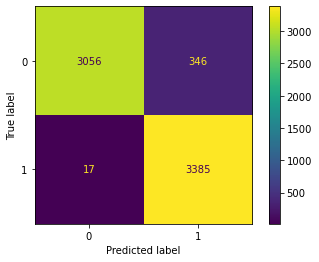

In [83]:
# Lakukan Prediksi di Data Train
y_pred = knn.predict(x_train)

# Classification Report
print(classification_report(y_train, y_pred))

# # Confusion Matrix
# [TN,FN]
# [FP,TP]
ConfusionMatrixDisplay.from_predictions(y_train, y_pred);

In [84]:
# Get params
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [85]:
# Tuning Hyperparameter
grid = {"n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        "p": [1, 2],
        "weights": ['uniform', 'distance']}

from sklearn.model_selection import GridSearchCV

gs_knn = GridSearchCV(estimator=knn,
                      param_grid=grid,
                      cv=5)

gs_knn.fit(x_train, y_train)

gs_knn.best_params_

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3402
           1       1.00      1.00      1.00      3402

    accuracy                           1.00      6804
   macro avg       1.00      1.00      1.00      6804
weighted avg       1.00      1.00      1.00      6804



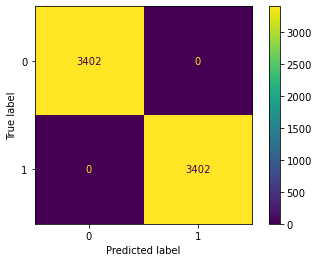

In [86]:
# Lakukan Prediksi di Data Train
gs_y_pred = gs_knn.predict(x_train)

# Classification Report
print(classification_report(y_train, gs_y_pred))

# # Confusion Matrix
# [TN,FN]
# [FP,TP]
ConfusionMatrixDisplay.from_predictions(y_train_res, gs_y_pred);

## 4.4 Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
# Initiate Model
dtc = DecisionTreeClassifier()

# Fit the data
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3402
           1       1.00      1.00      1.00      3402

    accuracy                           1.00      6804
   macro avg       1.00      1.00      1.00      6804
weighted avg       1.00      1.00      1.00      6804



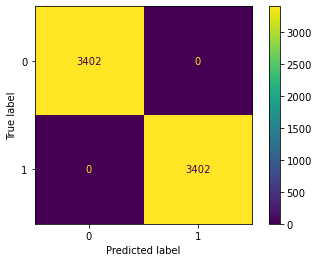

In [89]:
# Lakukan Prediksi di Data Train
y_pred = dtc.predict(x_train)

# Classification Report
print(classification_report(y_train, y_pred))

# # Confusion Matrix
# [TN,FN]
# [FP,TP]
ConfusionMatrixDisplay.from_predictions(y_train, y_pred);

In [90]:
# Get params
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [91]:
# Tuning Hyperparameter
grid = {"criterion": ["gini", "entropy", "log_loss"],
        "splitter": ["best", "random"],
        "max_depth": [1, 2, 3, 4, 5, 6, 7],
        "max_features": ["sqrt", "log2"]}

from sklearn.model_selection import GridSearchCV

gs_dtc = GridSearchCV(estimator=dtc,
                      param_grid=grid,
                      cv=5)

gs_dtc.fit(x_train, y_train)

gs_dtc.best_params_

{'criterion': 'log_loss',
 'max_depth': 7,
 'max_features': 'sqrt',
 'splitter': 'best'}

              precision    recall  f1-score   support

           0       0.65      0.92      0.76      3402
           1       0.87      0.51      0.64      3402

    accuracy                           0.72      6804
   macro avg       0.76      0.72      0.70      6804
weighted avg       0.76      0.72      0.70      6804



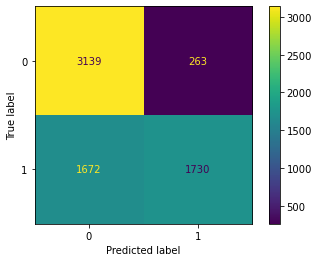

In [92]:
# Lakukan Prediksi di Data Train
gs_y_pred = gs_dtc.predict(x_train)

# Classification Report
print(classification_report(y_train, gs_y_pred))

# # Confusion Matrix
# [TN,FN]
# [FP,TP]
ConfusionMatrixDisplay.from_predictions(y_train, gs_y_pred);

## 4.5 Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
# Initiate Model
rfc = RandomForestClassifier()

# Fit the data
rfc.fit(x_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3402
           1       1.00      1.00      1.00      3402

    accuracy                           1.00      6804
   macro avg       1.00      1.00      1.00      6804
weighted avg       1.00      1.00      1.00      6804



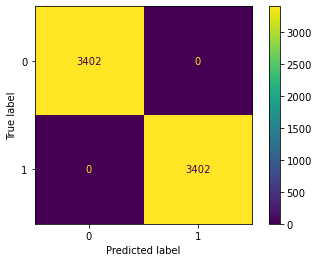

In [95]:
# Lakukan Prediksi di Data Train
y_pred = rfc.predict(x_train)

# Classification Report
print(classification_report(y_train, y_pred))

# # Confusion Matrix
# [TN,FN]
# [FP,TP]
ConfusionMatrixDisplay.from_predictions(y_train, y_pred);

In [96]:
# Get params
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [97]:
# Tuning Hyperparameter
grid = {"criterion": ["gini", "entropy", "log_loss"],
        "max_depth": [1, 2, 3, 4, 5, 6, 7],
        "max_features": ["sqrt", "log2"]}

from sklearn.model_selection import GridSearchCV

gs_rfc = GridSearchCV(estimator=rfc,
                      param_grid=grid,
                      cv=5)

gs_rfc.fit(x_train, y_train)

gs_rfc.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2'}

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      3402
           1       0.83      0.95      0.89      3402

    accuracy                           0.88      6804
   macro avg       0.89      0.88      0.88      6804
weighted avg       0.89      0.88      0.88      6804



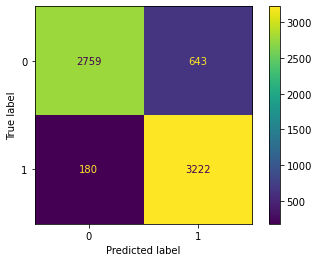

In [98]:
# Lakukan Prediksi di Data Train
gs_y_pred = gs_rfc.predict(x_train)

# Classification Report
print(classification_report(y_train, gs_y_pred))

# # Confusion Matrix
# [TN,FN]
# [FP,TP]
ConfusionMatrixDisplay.from_predictions(y_train, gs_y_pred);

## 4.6 Support Vector Machine

In [99]:
from sklearn.svm import SVC

In [100]:
# Initiate Model
svc = SVC()

# Fit the data
svc.fit(x_train, y_train)

SVC()

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3402
           1       0.86      0.95      0.91      3402

    accuracy                           0.90      6804
   macro avg       0.91      0.90      0.90      6804
weighted avg       0.91      0.90      0.90      6804



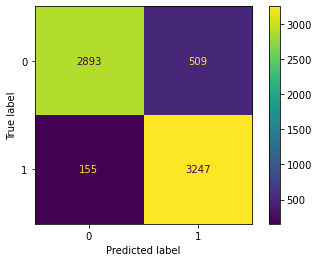

In [101]:
# Lakukan Prediksi di Data Test
y_pred = svc.predict(x_train)

# Classification Report
print(classification_report(y_train, y_pred))

# # Confusion Matrix
# [TN,FN]
# [FP,TP]
ConfusionMatrixDisplay.from_predictions(y_train, y_pred);

In [102]:
# Get params
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [103]:
# Tuning Hyperparameter
grid = {"C": [1, 5],
        "kernel": ["linear", "poly", "rbf", "sigmoid"]}

from sklearn.model_selection import GridSearchCV

gs_svc = GridSearchCV(estimator=svc,
                      param_grid=grid,
                      cv=5)

gs_svc.fit(x_train, y_train)

gs_svc.best_params_

{'C': 5, 'kernel': 'rbf'}

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3402
           1       0.90      0.96      0.93      3402

    accuracy                           0.93      6804
   macro avg       0.93      0.93      0.93      6804
weighted avg       0.93      0.93      0.93      6804



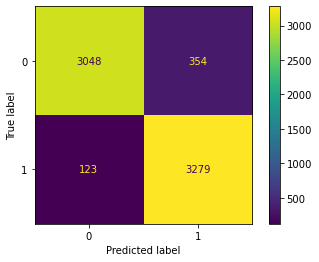

In [104]:
# Lakukan Prediksi di Data Train
gs_y_pred = gs_svc.predict(x_train)

# Classification Report
print(classification_report(y_train, gs_y_pred))

# # Confusion Matrix
# [TN,FN]
# [FP,TP]
ConfusionMatrixDisplay.from_predictions(y_train, gs_y_pred);

## 4.7 Adaboost

In [105]:
from sklearn.ensemble import AdaBoostClassifier

In [106]:
# Initiate Model
ada = AdaBoostClassifier()

# Fit the data
ada.fit(x_train, y_train)

AdaBoostClassifier()

              precision    recall  f1-score   support

           0       0.89      0.79      0.83      3402
           1       0.81      0.90      0.85      3402

    accuracy                           0.84      6804
   macro avg       0.85      0.84      0.84      6804
weighted avg       0.85      0.84      0.84      6804



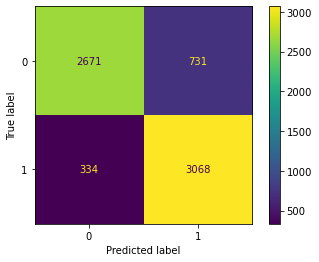

In [107]:
# Lakukan Prediksi di Data Test
y_pred = ada.predict(x_train)

# Classification Report
print(classification_report(y_train, y_pred))

# # Confusion Matrix
# [TN,FN]
# [FP,TP]
ConfusionMatrixDisplay.from_predictions(y_train, y_pred);

In [108]:
# Get params
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [109]:
# Tuning Hyperparameter
grid = {"learning_rate": [0.1, 0.5, 1, 5],
        "n_estimators": [50, 100]}

from sklearn.model_selection import GridSearchCV

gs_ada = GridSearchCV(estimator=ada,
                      param_grid=grid,
                      cv=5)

gs_ada.fit(x_train, y_train)

gs_ada.best_params_

{'learning_rate': 1, 'n_estimators': 100}

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      3402
           1       0.85      0.89      0.87      3402

    accuracy                           0.87      6804
   macro avg       0.87      0.87      0.87      6804
weighted avg       0.87      0.87      0.87      6804



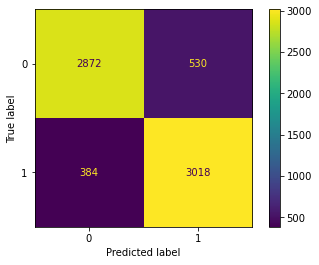

In [110]:
# Lakukan Prediksi di Data Train
gs_y_pred = gs_ada.predict(x_train)

# Classification Report
print(classification_report(y_train, gs_y_pred))

# # Confusion Matrix
# [TN,FN]
# [FP,TP]
ConfusionMatrixDisplay.from_predictions(y_train, gs_y_pred);

Dari hasil pengetesan performa di Data Train didapatkan model yang memiliki performa bagus ada di:
* `Model KNearestNeighbor (KNN)`
* `Support Vector Machine (SVC)`

Untuk lebih meyakinkan performa prediksinya maka dilakukan Sanity Check di Data Test

# 5. Sanity Check menggunakan Data Test

## 5.1 Model KNN

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1458
           1       0.05      0.08      0.06        75

    accuracy                           0.88      1533
   macro avg       0.50      0.50      0.50      1533
weighted avg       0.91      0.88      0.89      1533



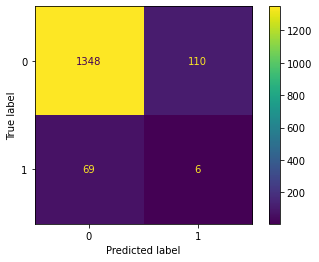

In [111]:
# Lakukan Prediksi di Data Test
y_test_pred_knn = gs_knn.predict(x_test)

# Classification Report
print(classification_report(y_test, y_test_pred_knn))

# # Confusion Matrix
# [TN,FN]
# [FP,TP]
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_knn);

## 5.2 Model Decision Tree

              precision    recall  f1-score   support

           0       0.96      0.14      0.24      1458
           1       0.05      0.88      0.09        75

    accuracy                           0.18      1533
   macro avg       0.50      0.51      0.17      1533
weighted avg       0.91      0.18      0.24      1533



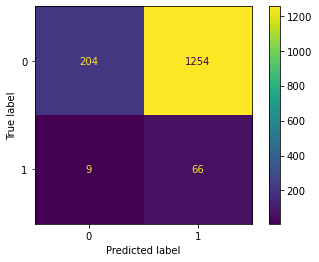

In [112]:
# Lakukan Prediksi di Data Test
y_test_pred_dtc = gs_dtc.predict(x_test)

# Classification Report
print(classification_report(y_test, y_test_pred_dtc))

# # Confusion Matrix
# [TN,FN]
# [FP,TP]
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_dtc);

## 5.3 Model Random Forest

              precision    recall  f1-score   support

           0       1.00      0.41      0.58      1458
           1       0.08      0.97      0.14        75

    accuracy                           0.44      1533
   macro avg       0.54      0.69      0.36      1533
weighted avg       0.95      0.44      0.56      1533



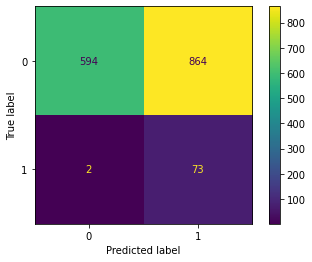

In [113]:
# Lakukan Prediksi di Data Test
y_test_pred_rfc = gs_rfc.predict(x_test)

# Classification Report
print(classification_report(y_test, y_test_pred_rfc))

# # Confusion Matrix
# [TN,FN]
# [FP,TP]
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_rfc);

## 5.4 Model Support Vector Machine

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1458
           1       0.10      0.25      0.14        75

    accuracy                           0.85      1533
   macro avg       0.53      0.57      0.53      1533
weighted avg       0.92      0.85      0.88      1533



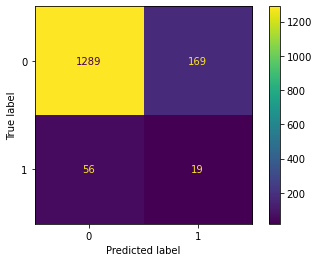

In [114]:
# Lakukan Prediksi di Data Test
y_test_pred_svc = gs_svc.predict(x_test)

# Classification Report
print(classification_report(y_test, y_test_pred_svc))

# # Confusion Matrix
# [TN,FN]
# [FP,TP]
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_svc);

## 5.5 Model Adaboost

              precision    recall  f1-score   support

           0       1.00      0.07      0.14      1458
           1       0.05      1.00      0.10        75

    accuracy                           0.12      1533
   macro avg       0.53      0.54      0.12      1533
weighted avg       0.95      0.12      0.13      1533



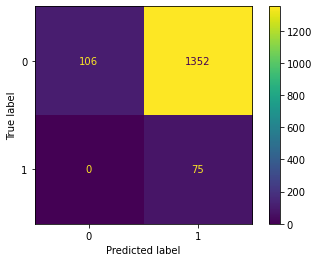

In [115]:
# Lakukan Prediksi di Data Test
y_test_pred_ada = gs_ada.predict(x_test)

# Classification Report
print(classification_report(y_test, y_test_pred_ada))

# # Confusion Matrix
# [TN,FN]
# [FP,TP]
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_ada);

Dari hasil pengetesan performa di Data Test (Sanity Check) didapatkan model yang memiliki performa bagus ada di:
* `Model KNearestNeighbor (KNN)`
* `Support Vector Machine (SVC)`

Dengan begitu dikesimpulan akan dijabarkan perbedaan performa diantara kedua model tersebut

# 6. Kesimpulan

In [116]:
report_knn = classification_report(y_test, y_test_pred_knn, output_dict=True)
report_knn

{'0': {'precision': 0.9513055751587862,
  'recall': 0.9245541838134431,
  'f1-score': 0.9377391304347827,
  'support': 1458},
 '1': {'precision': 0.05172413793103448,
  'recall': 0.08,
  'f1-score': 0.06282722513089005,
  'support': 75},
 'accuracy': 0.883235485975212,
 'macro avg': {'precision': 0.5015148565449103,
  'recall': 0.5022770919067215,
  'f1-score': 0.5002831777828364,
  'support': 1533},
 'weighted avg': {'precision': 0.9072947416349237,
  'recall': 0.883235485975212,
  'f1-score': 0.8949352211733398,
  'support': 1533}}

In [117]:
df = pd.DataFrame(report_knn).transpose()
round(df,2)

,precision,recall,f1-score,support
0,0.95,0.92,0.94,1458.00
1,0.05,0.08,0.06,75.00
accuracy,0.88,0.88,0.88,0.88
macro avg,0.50,0.50,0.50,1533.00
weighted avg,0.91,0.88,0.89,1533.00


In [118]:
report_svc = classification_report(y_test, y_test_pred_svc, output_dict=True)
report_svc

{'0': {'precision': 0.958364312267658,
  'recall': 0.8840877914951989,
  'f1-score': 0.9197288619336424,
  'support': 1458},
 '1': {'precision': 0.10106382978723404,
  'recall': 0.25333333333333335,
  'f1-score': 0.1444866920152091,
  'support': 75},
 'accuracy': 0.8532289628180039,
 'macro avg': {'precision': 0.5297140710274459,
  'recall': 0.5687105624142661,
  'f1-score': 0.5321077769744258,
  'support': 1533},
 'weighted avg': {'precision': 0.916422018604232,
  'recall': 0.8532289628180039,
  'f1-score': 0.8818011628182593,
  'support': 1533}}

In [119]:
df = pd.DataFrame(report_svc).transpose()
round(df,2)

,precision,recall,f1-score,support
0,0.96,0.88,0.92,1458.00
1,0.10,0.25,0.14,75.00
accuracy,0.85,0.85,0.85,0.85
macro avg,0.53,0.57,0.53,1533.00
weighted avg,0.92,0.85,0.88,1533.00


Dikarenakan kasus kita adalah memprediksi apakah pasien akan mengalami stroke atau tidak, jika kita mempertimbangkan akurasi maka:

* Model yang dipilih adalah `Model KNN`

Jika yang dipertimbangkan adalah meminimilkan risiko pasien salah prediksi ketika pasien tidak stroke namun diprediksi stroke (False Positive) maka:

* Model yang dipilih adalah `Model SVC`

Namun karena Weighted Average dari `Model SVC` dengan `Model KNN` berbeda tipis dan mempertimbangkan akurasi yang lebih optimal maka model yang akan digunakan adalah `Model KNN`

## 7. Simpan dan Test Model

In [120]:
import pickle

In [121]:
pickle.dump(gs_knn, open("gs_knn_model.pkl","wb"))

In [122]:
# Load saved Model
load_pickle_model = pickle.load(open("gs_knn_model.pkl","rb"))

In [123]:
# Make some Prediction
pickle_y_preds = load_pickle_model.predict(x_test)
print(classification_report(pickle_y_preds, y_test))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1417
           1       0.08      0.05      0.06       116

    accuracy                           0.88      1533
   macro avg       0.50      0.50      0.50      1533
weighted avg       0.86      0.88      0.87      1533



In [124]:
pickle.dump(gs_svc, open("gs_svc_model.pkl","wb"))

In [125]:
# Load saved Model
load_pickle_model = pickle.load(open("gs_svc_model.pkl","rb"))

In [126]:
# Make some Prediction
pickle_y_preds = load_pickle_model.predict(x_test)
print(classification_report(pickle_y_preds, y_test))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1345
           1       0.25      0.10      0.14       188

    accuracy                           0.85      1533
   macro avg       0.57      0.53      0.53      1533
weighted avg       0.81      0.85      0.82      1533



# 8. Test Prediction

In [127]:
input_data = [25, 0, 0, 120, 25, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = load_pickle_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("person is not stroke")
else:
    print("The person is stroke")

[0]
person is not stroke


C:\Users\akbar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
